In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from global_land_mask import globe
import matplotlib as mpl

mpl.rcParams['figure.dpi']= 500

In [2]:
a = '/media/rakshith/Seagate Expansion Drive/Good models/CMCC-CM2-SR5/MSE/*.nc'
b = '/media/rakshith/Seagate Expansion Drive/Good models/CMCC-CM2-SR5/Vertical velocity/wap_Amon_*.nc'
ds1 = xr.open_mfdataset(a)
ds2 = xr.open_mfdataset(b)

ds = xr.merge([ds1, ds2])

In [3]:
grid1 = ds.sel(lon=slice(70, 90), lat=slice(10, 30))

In [4]:
l=[]
for i in grid1.lon:
    if i>180:
        l.append(i-360)
    else:
        l.append(i)
            
lon_grid, lat_grid = np.meshgrid(l, grid1.lat)
mask1 = globe.is_land(lat_grid, lon_grid)

jjas = grid1.time.dt.month.isin(range(6, 10)) #JJAS
clim = grid1.sel(time=jjas)
clim1 = clim.groupby('time.year').mean('time')

In [5]:
clim2 = clim1.sel(plev=50000)

In [6]:
w = clim2.wap.where(mask1>0).mean(dim=['lat', 'lon'])
T = clim2.ta.where(mask1>0).mean(dim=['lat', 'lon'])
z = clim2.zg.where(mask1>0).mean(dim=['lat', 'lon'])

In [7]:
T = np.array([270.94864, 270.7258 , 270.49448, 270.98062, 270.78586, 270.4636 ,
       270.8402 , 270.62363, 270.22696, 270.52777, 270.6354 , 270.49606,
       270.62067, 270.5341 , 270.63376, 270.96515, 271.12875, 270.71942,
       271.04663, 270.77658, 270.79327, 271.26578, 271.06735, 270.85715,
       270.62643, 270.40732, 271.04303, 270.95505, 270.9144 , 270.9928 ,
       271.49893, 271.5117 , 270.8505 , 270.87436, 271.0271 , 270.93054,
       270.92242, 270.9615 , 271.64874, 271.03397, 271.18784, 271.62686,
       270.9506 , 270.93884, 270.45013, 270.8661 , 270.9055 , 270.62613,
       271.20816, 271.22885, 271.37268, 271.18933, 271.38538, 271.87177,
       271.63113, 271.46057, 271.70132, 271.78937, 272.24634, 271.84976,
       272.0425 , 271.85498, 271.83875, 271.8607 , 271.60577, 271.80676,
       271.95862, 272.0209 , 271.74265, 271.5077 , 271.93402, 271.94406,
       272.49173, 271.50693, 272.04385, 271.55026, 272.10242, 272.05173,
       272.21475, 272.1081 , 272.6214 , 272.42053, 271.84915, 272.00793,
       272.2106 , 272.36743, 272.66843, 272.7103 , 272.71872, 273.07446,
       272.82056, 273.03256, 272.90488, 273.27206, 272.8558 , 272.77402,
       272.9159 , 273.14752, 273.71347, 273.36334, 273.00198, 273.18658,
       273.45053, 273.50052, 273.74844, 273.58884, 274.01834, 273.8633 ,
       273.63702, 273.59976, 274.30606, 274.22   , 274.097  , 274.60956,
       274.44437, 273.89584, 274.17502, 274.5275 , 274.83014, 274.72186,
       274.00952, 274.3927 , 275.1092 , 275.26068, 275.1494 , 274.75037,
       274.83008, 275.2695 , 274.8468 , 275.6817 , 275.002  , 275.031  ,
       275.26663, 275.31708, 275.76468, 275.5521 , 275.502  , 275.4729 ,
       275.8583 , 276.37228, 275.84915, 275.95566, 275.85742, 276.58313,
       275.93546, 275.81232, 276.51163, 276.71027, 276.32343, 276.9777 ,
       276.93286])

In [8]:
w = np.array([-0.03897585, -0.02329904, -0.02471476, -0.0353606 , -0.04903635,
       -0.03166926, -0.03404611, -0.03513328, -0.04379842, -0.04314486,
       -0.03909702, -0.03418248, -0.03203168, -0.03200062, -0.02535923,
       -0.03207995, -0.04254023, -0.04084423, -0.03709747, -0.03635739,
       -0.0215215 , -0.01931486, -0.03707112, -0.04986605, -0.04212321,
       -0.03953558, -0.04292   , -0.04645279, -0.03798497, -0.02994482,
       -0.03386589, -0.04210494, -0.02669263, -0.03564278, -0.03179957,
       -0.03717136, -0.04444529, -0.02574336, -0.02852175, -0.02334177,
       -0.02853308, -0.01015352, -0.02687865, -0.03805987, -0.04546124,
       -0.03604913, -0.03959373, -0.03174725, -0.0399586 , -0.04516314,
       -0.03960118, -0.01882767, -0.02868068, -0.04745954, -0.05113147,
       -0.04264603, -0.04254349, -0.03426191, -0.0283266 , -0.03511424,
       -0.03847591, -0.03262893, -0.03051351, -0.02884354, -0.04220195,
       -0.02481322, -0.040527  , -0.03634444, -0.04416505, -0.03173887,
       -0.02588442, -0.03500722, -0.02495512, -0.02852722, -0.03554898,
       -0.02222149, -0.02334321, -0.03847319, -0.03088627, -0.03120566,
       -0.03622095, -0.03651625, -0.0365316 , -0.04317442, -0.04695543,
       -0.03750915, -0.03549703, -0.02998182, -0.03102694, -0.04275187,
       -0.03600827, -0.03173272, -0.02346713, -0.0373604 , -0.04839514,
       -0.04245093, -0.03864593, -0.0327768 , -0.0374379 , -0.03857388,
       -0.04249815, -0.04372667, -0.03643727, -0.03887714, -0.03032737,
       -0.02658739, -0.03907515, -0.04092076, -0.03899509, -0.03771586,
       -0.04123674, -0.0344661 , -0.02647221, -0.0350535 , -0.0429955 ,
       -0.03922673, -0.03593631, -0.04083408, -0.04034774, -0.04532102,
       -0.03906691, -0.0398719 , -0.03199185, -0.03956674, -0.03897801,
       -0.03616475, -0.04315013, -0.0384552 , -0.03904198, -0.03184316,
       -0.04200119, -0.03695447, -0.04140256, -0.03817369, -0.03878419,
       -0.04434608, -0.04391077, -0.03357153, -0.02854419, -0.03834944,
       -0.03851605, -0.04128243, -0.02908609, -0.03083873, -0.04233314,
       -0.0384802 , -0.03149269, -0.04853835, -0.03732086, -0.04425521,
       -0.03953345])

In [9]:
z = np.array([5856.2144, 5867.224 , 5871.077 , 5868.2236, 5857.7373, 5860.7344,
       5869.1885, 5867.9536, 5854.5884, 5856.199 , 5858.943 , 5858.251 ,
       5861.741 , 5858.6006, 5870.618 , 5876.3164, 5865.139 , 5865.007 ,
       5865.7505, 5861.993 , 5867.9355, 5885.593 , 5877.66  , 5862.361 ,
       5861.038 , 5859.473 , 5871.05  , 5864.2256, 5866.904 , 5871.402 ,
       5879.026 , 5879.174 , 5869.815 , 5882.502 , 5882.7046, 5867.652 ,
       5864.7056, 5874.0903, 5876.795 , 5874.076 , 5875.929 , 5889.2446,
       5871.434 , 5869.1914, 5861.581 , 5864.1973, 5870.3066, 5863.367 ,
       5876.7383, 5872.3857, 5878.403 , 5879.0864, 5886.953 , 5890.2715,
       5884.8623, 5879.983 , 5882.8906, 5888.7227, 5900.2524, 5890.3745,
       5886.9814, 5887.6045, 5895.171 , 5889.2134, 5879.2373, 5898.9536,
       5902.5234, 5894.41  , 5883.6113, 5881.2437, 5896.9   , 5894.73  ,
       5898.2026, 5888.8193, 5893.1494, 5893.7295, 5898.1675, 5898.8154,
       5897.928 , 5906.415 , 5907.2314, 5903.294 , 5902.6133, 5897.8525,
       5898.0845, 5900.2207, 5904.019 , 5914.111 , 5914.679 , 5913.173 ,
       5910.394 , 5916.616 , 5922.789 , 5934.3765, 5918.0317, 5918.1694,
       5909.729 , 5926.055 , 5932.6313, 5940.053 , 5926.3906, 5922.0176,
       5926.9624, 5921.9673, 5935.2783, 5932.901 , 5944.662 , 5939.235 ,
       5933.749 , 5932.757 , 5941.928 , 5944.426 , 5948.461 , 5959.051 ,
       5946.8447, 5939.5527, 5950.37  , 5952.5845, 5961.515 , 5947.3403,
       5945.2734, 5951.597 , 5963.636 , 5965.6675, 5966.0464, 5956.4644,
       5964.068 , 5965.571 , 5958.478 , 5982.5566, 5964.3823, 5963.4067,
       5968.4683, 5967.441 , 5982.862 , 5975.834 , 5975.3286, 5972.764 ,
       5984.9014, 5992.9595, 5987.0063, 5980.1465, 5982.928 , 6001.7417,
       5995.659 , 5993.422 , 6001.8047, 5993.9126, 5990.229 , 6006.1675,
       6003.2974])

In [12]:
Pr = '/media/rakshith/Seagate Expansion Drive/Good models/CMCC-CM2-SR5/*.nc'
d = xr.open_mfdataset(Pr)

In [13]:
grid = d.sel(time=slice('1950', '2100'),lon=slice(70, 90), lat=slice(10, 30))

In [14]:
jjas = grid.time.dt.month.isin(range(6, 10)) #JJAS
clim0 = grid.sel(time=jjas)
clim10 = clim0.groupby('time.year').mean('time')

In [17]:
E = 86400*clim10.evspsbl.where(mask1>0).mean(dim=['lat', 'lon'])

In [13]:
P = 86400*clim10.pr.where(mask1>0).mean(dim=['lat', 'lon'])

In [42]:
E = np.array([2.87757536, 2.52845626, 2.46478653, 2.53081854, 3.08521605,
       2.79398127, 2.69926524, 3.013696  , 2.84515374, 2.80048238,
       2.80497592, 2.79389892, 2.69819341, 2.7488243 , 2.51809041,
       2.79000039, 3.07425158, 3.02771284, 2.86515338, 2.57395647,
       2.69549496, 2.23889964, 2.80690491, 3.25723188, 3.22631303,
       2.93486608, 3.04684181, 3.09649045, 3.10554164, 2.61745085,
       3.00779241, 2.86754756, 2.54655409, 2.75491019, 2.86830853,
       2.92605503, 3.08942733, 2.58479003, 2.84557336, 2.31360581,
       2.81362102, 2.14653583, 2.40739161, 2.64815722, 3.0461962 ,
       2.85222062, 2.83934099, 2.75479546, 2.76506277, 2.97348361,
       3.14193346, 2.36733622, 2.60772559, 3.0294281 , 3.23856433,
       2.85242179, 3.07410479, 2.80459434, 2.62788726, 2.99855482,
       2.83105799, 2.95654797, 2.51250413, 2.81471926, 2.90236588,
       2.59157136, 2.84980538, 2.79149751, 2.98354095, 2.86132997,
       2.53698364, 2.66776301, 2.5465203 , 2.54241904, 2.85460978,
       2.6417152 , 2.55491048, 2.80849161, 2.67028922, 2.85216247,
       2.6601184 , 2.88405855, 2.88874885, 3.21158613, 3.23875858,
       2.55223718, 2.86204505, 2.71343768, 2.90788568, 3.06096553,
       2.94360296, 2.6360582 , 2.61704538, 3.06577716, 3.29716232,
       3.39020805, 3.05099589, 2.83913511, 2.89273759, 2.99104191,
       3.05690544, 3.27830587, 2.97573446, 3.04274464, 2.82978154,
       2.54413162, 3.26541555, 3.28090877, 3.24044995, 3.17369092,
       3.09397399, 2.84648803, 2.59907892, 3.0735739 , 3.13177271,
       2.96514372, 2.93979967, 3.29198859, 2.88458472, 3.03521632,
       3.28224337, 3.18654478, 2.97897889, 3.11418768, 3.00051022,
       3.42622771, 3.22970393, 3.0748227 , 2.91024435, 3.29833946,
       3.10319492, 3.19136867, 3.26075668, 2.97010811, 3.28192748,
       2.98276237, 3.47935556, 3.04868971, 2.66144924, 3.07354373,
       3.21472966, 3.36828068, 2.90270284, 3.02957457, 3.35520051,
       3.46509889, 3.08970425, 3.08034313, 2.88420471, 3.09055386,
       2.94803552])

In [44]:
P = np.array([ 7.95597236,  5.89172146,  6.6436643 ,  7.42553368,  9.09930628,
        6.94183898,  7.15098842,  7.74304918,  8.21014016,  8.17497578,
        7.85520847,  7.32121922,  6.85711869,  7.11941358,  6.18401959,
        7.40884258,  8.6658238 ,  8.09921427,  7.84397589,  7.27440985,
        5.71683997,  5.57091313,  8.05633895,  9.44991605,  8.51461573,
        8.10961076,  8.7547736 ,  9.01470354,  7.78800845,  6.86140351,
        7.35842795,  8.79401977,  6.29477324,  7.74138705,  7.54977989,
        7.72061355,  8.61504895,  6.06575806,  6.75714249,  5.85546135,
        6.5680983 ,  4.65871103,  6.51911509,  7.77479878,  8.68104324,
        7.3251935 ,  8.03373421,  7.27289922,  8.19207234,  8.61950477,
        8.32409486,  5.37980762,  7.07943882,  9.55206044,  9.95192374,
        8.63657431,  8.63090144,  7.5734684 ,  6.63864773,  7.98542679,
        8.11417848,  7.63755036,  6.78544147,  6.81317593,  8.45075757,
        5.79700198,  8.4105653 ,  7.65521207,  8.94419183,  7.2068119 ,
        6.32969434,  7.42415632,  6.06148455,  6.74641281,  7.54478469,
        5.61907974,  5.85832859,  7.96305088,  7.02671832,  7.31925659,
        7.91796902,  8.04708595,  7.97617065,  8.54690156,  9.54183054,
        7.99894324,  7.74923314,  7.14812495,  7.52109492,  9.36139561,
        8.31630912,  7.32899678,  6.67889281,  8.7264281 ,  9.88070103,
        9.09279292,  8.45451308,  7.80140797,  8.68817142,  8.70457334,
        8.75245831,  9.28464336,  8.24536993,  8.41218908,  7.37568797,
        7.03012934,  9.30592229,  9.3751786 ,  8.57424878,  8.68934195,
        9.14952038,  7.96798132,  7.18548456,  8.50969472,  9.42431898,
        8.49696784,  7.96010632, 10.04083268,  9.48833555,  9.88446157,
        8.99544193,  9.02317199,  7.94629189,  9.37181285,  9.25975917,
        8.98680438,  9.79337501,  9.27967834,  9.14023407,  8.42332989,
        9.84364757,  8.65209172,  9.83349876,  8.8033482 ,  9.7113824 ,
       10.37767329, 10.61546244,  8.30561654,  8.1143721 ,  9.76414753,
       10.13605634,  9.95682527,  7.81665633,  8.84277604, 10.06972573,
        9.83843675,  8.83579245, 11.27345776,  9.22039167, 10.86809887,
        9.82207004])
P = P-E

In [45]:
dP = np.ediff1d(P)
dT = np.ediff1d(T)

In [46]:
dmbym = dP/P[:-1] - 0.07*dT

In [47]:
M2 = w/T
dM2 = np.ediff1d(M2)

In [48]:
dMbyM = dM2/M2[:-1]

In [49]:
X = np.arange(1950, 2101, 1)

Text(0.5, 1.0, 'Convective mass flux at 500mb, India')

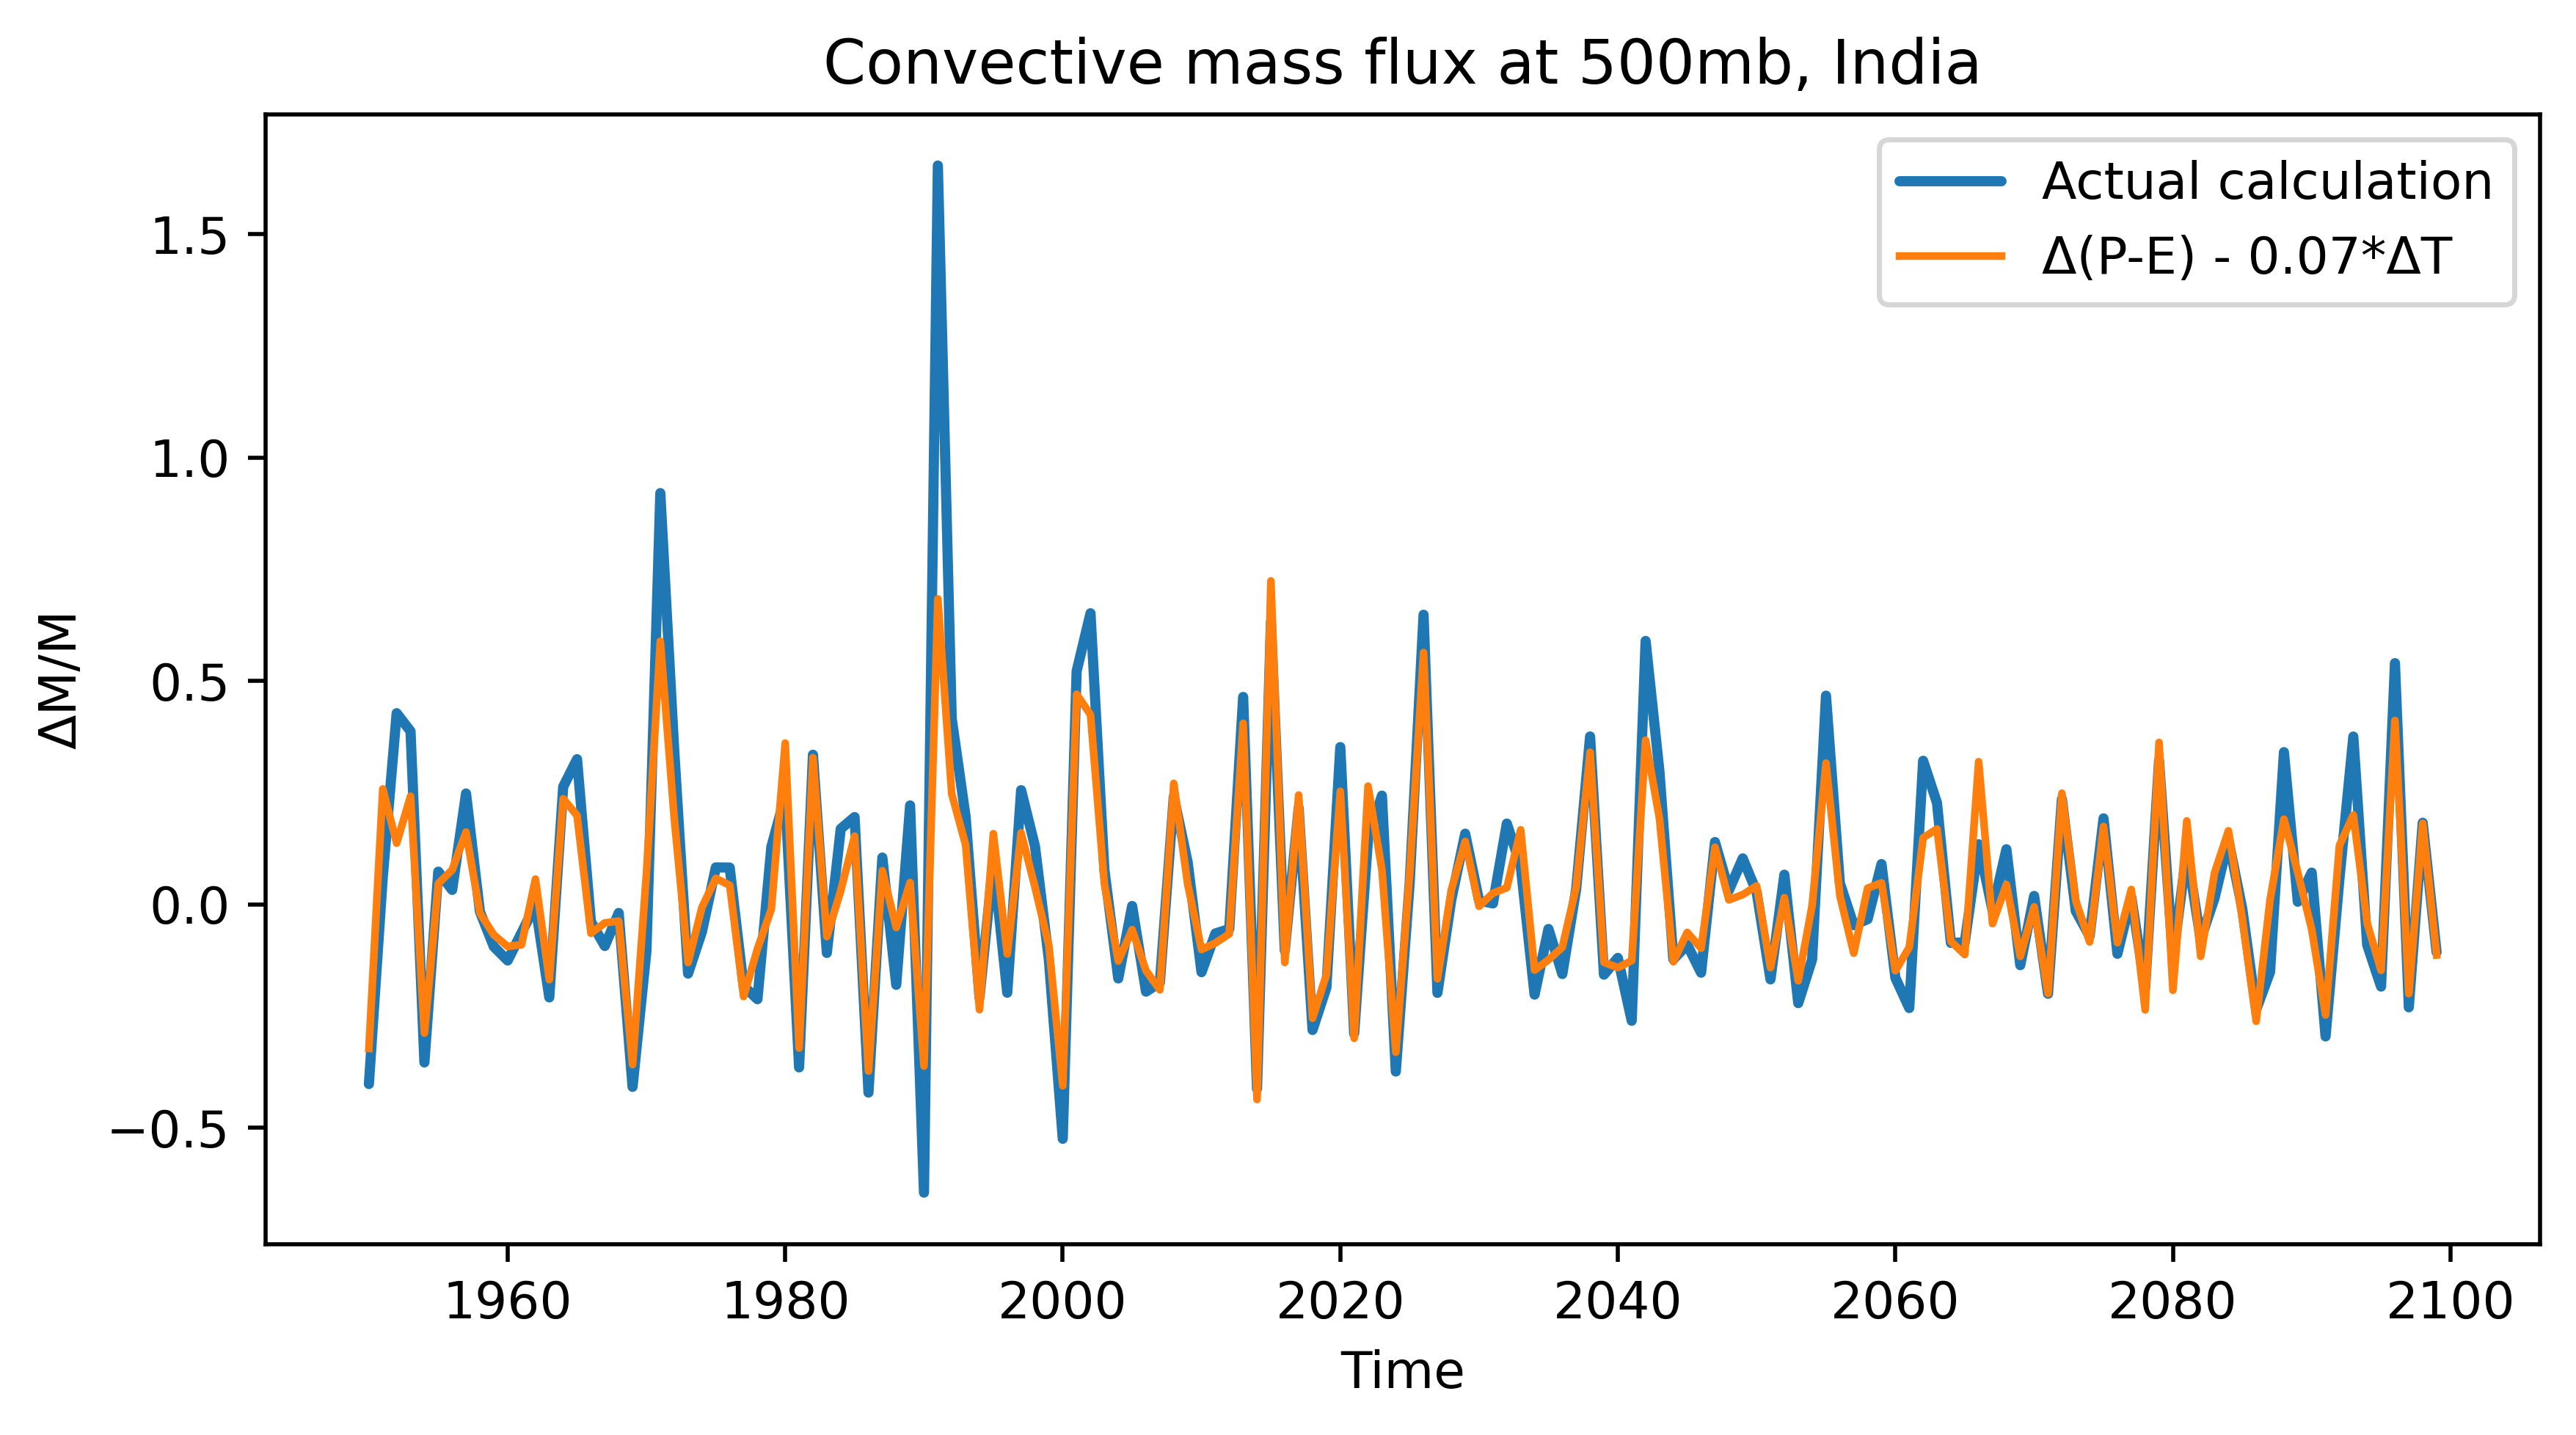

In [50]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.plot(X[:-1], dMbyM, label='Actual calculation',lw=2, solid_capstyle='round')
plt.plot(X[:-1], dmbym, label='\u0394(P-E) - 0.07*\u0394T')
plt.ylabel('\u0394M/M')
plt.xlabel('Time')
plt.legend()
plt.title('Convective mass flux at 500mb, India')

Text(0.5, 1.0, 'Convective mass flux at 500mb, India')

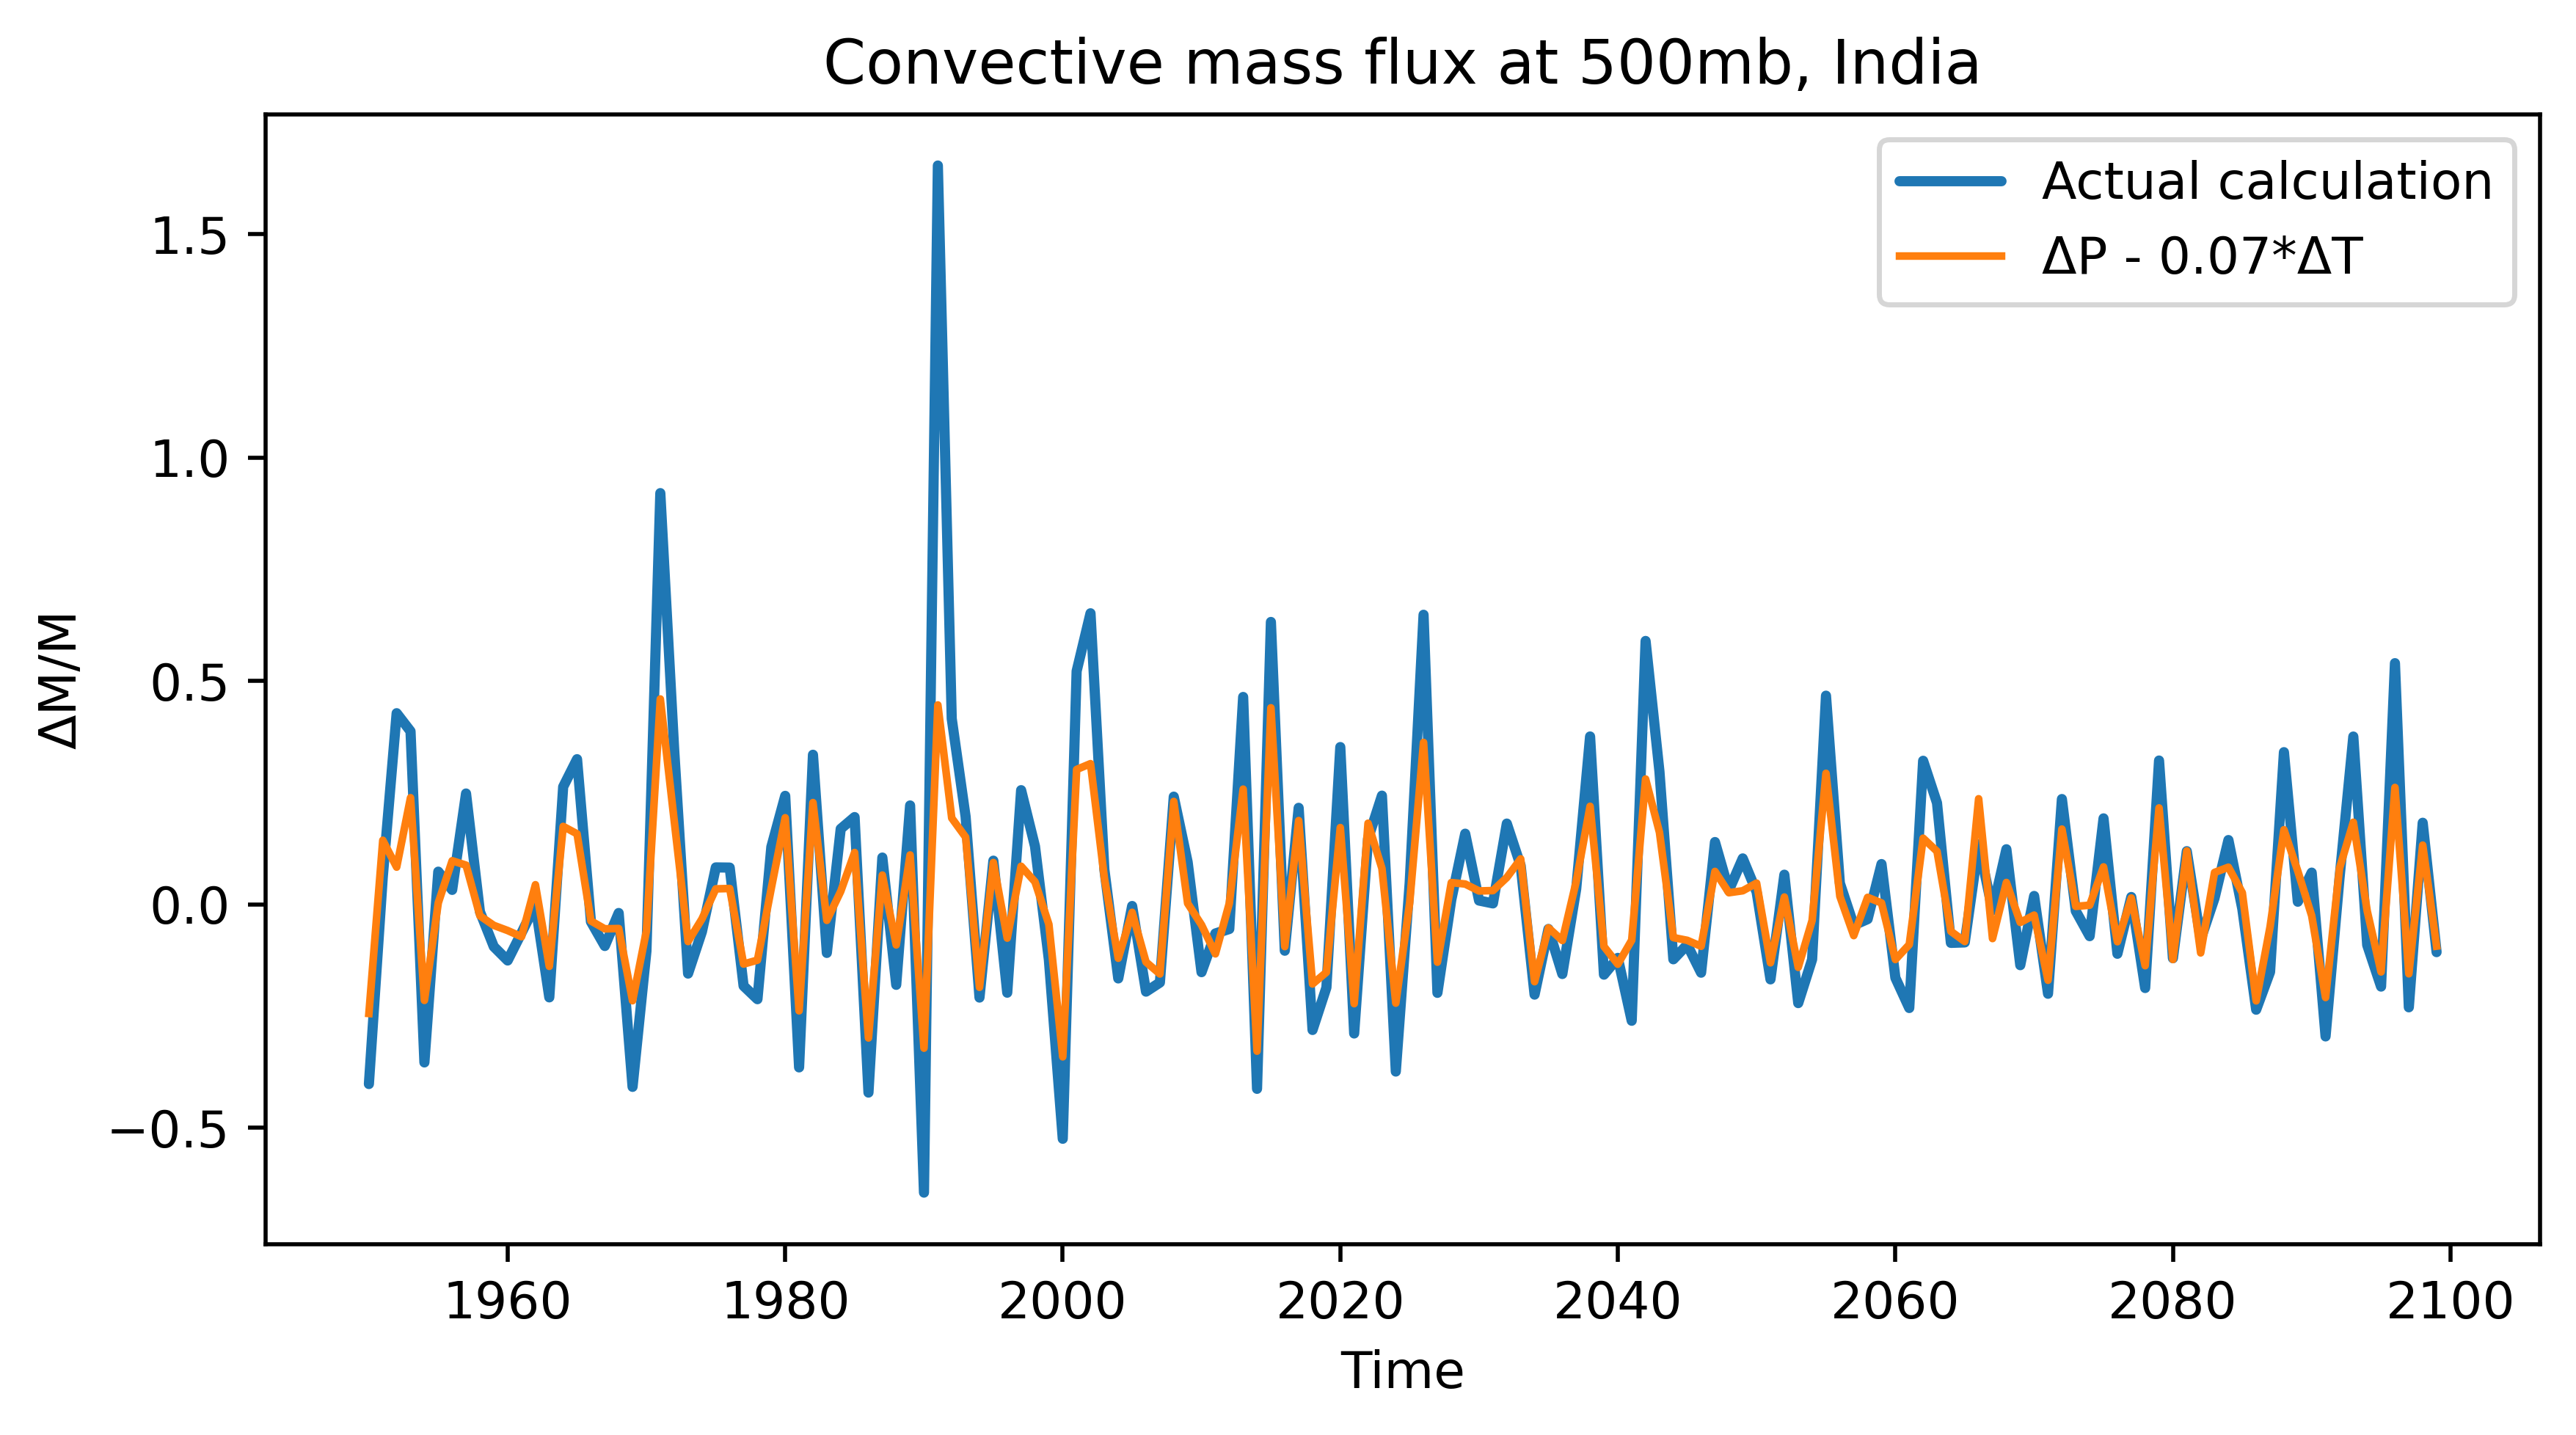

In [39]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.plot(X[:-1], dMbyM, label='Actual calculation',lw=2, solid_capstyle='round')
plt.plot(X[:-1], dmbym, label='\u0394P - 0.07*\u0394T')
plt.ylabel('\u0394M/M')
plt.xlabel('Time')
plt.legend()
plt.title('Convective mass flux at 500mb, India')

Text(0.5, 1.0, 'Convective mass flux at 500mb, India')

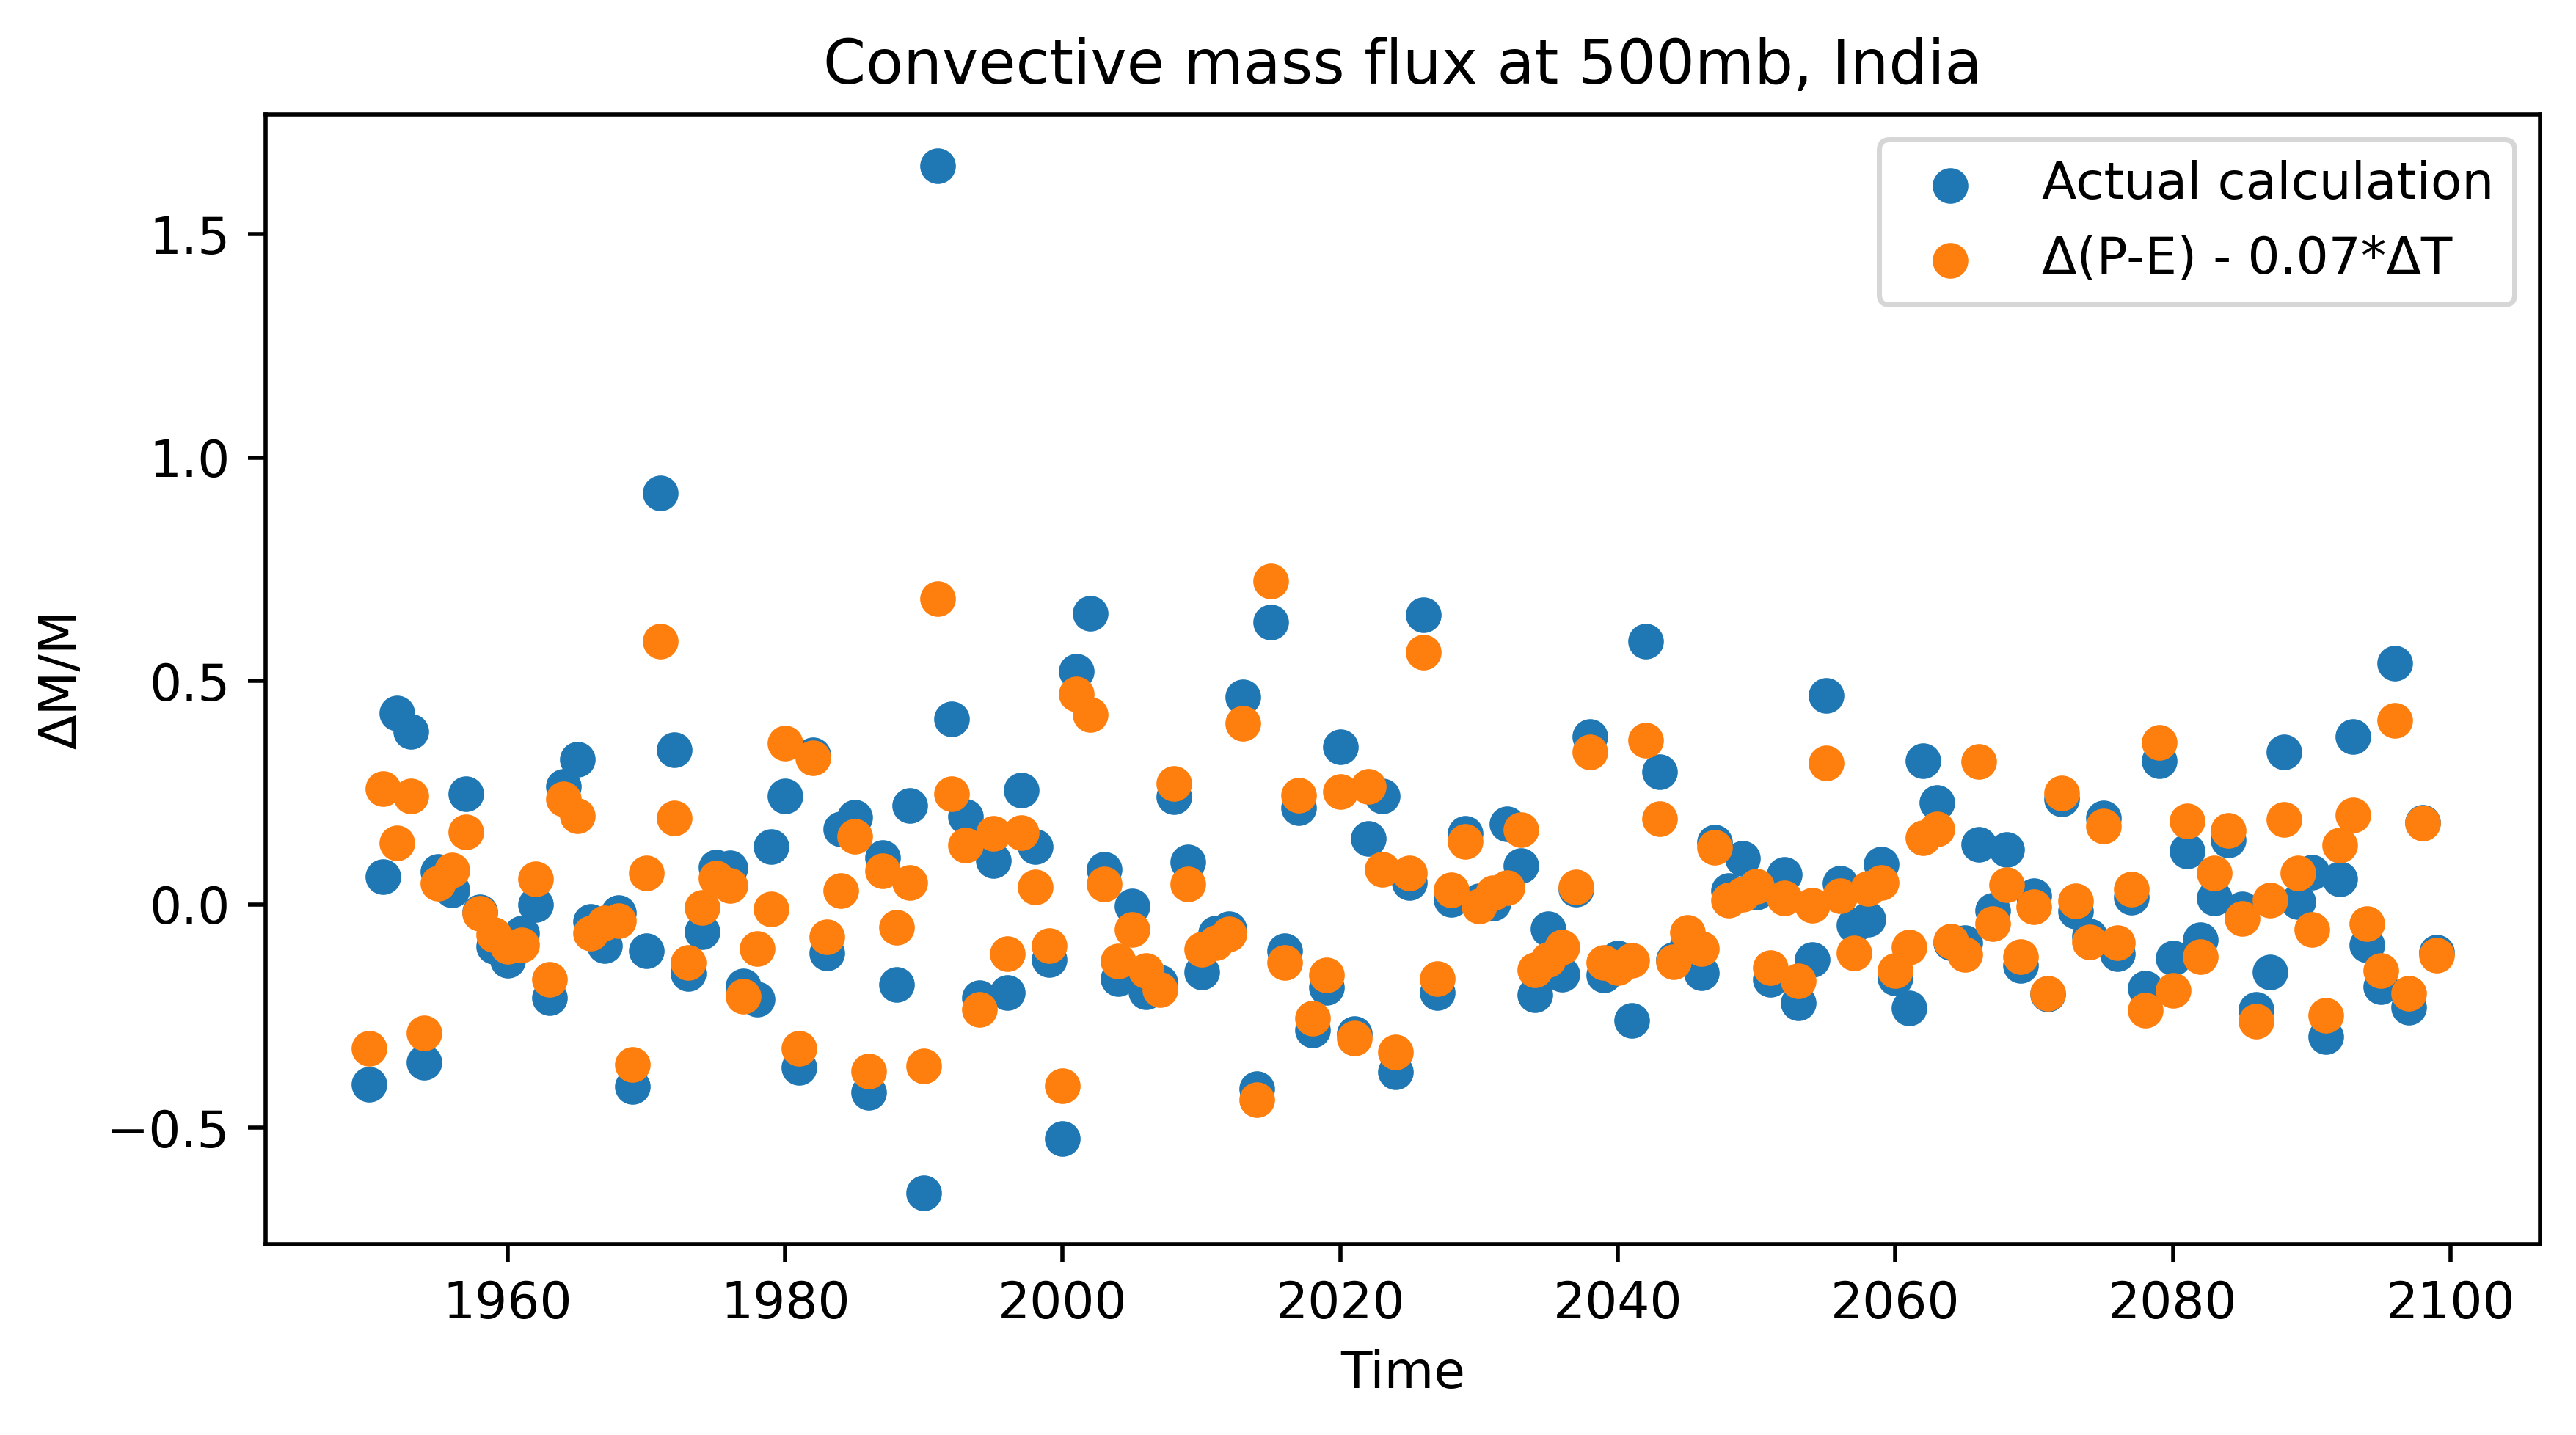

In [51]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.scatter(X[:-1], dMbyM, label='Actual calculation')
plt.scatter(X[:-1], dmbym, label='\u0394(P-E) - 0.07*\u0394T')
plt.ylabel('\u0394M/M')
plt.xlabel('Time')
plt.legend()
plt.title('Convective mass flux at 500mb, India')

In [40]:
from scipy.optimize import curve_fit
def f(g, a, b):
    return a  + b * g

popt1, _ = curve_fit(f, X[:-1], dmbym)
a1, b1 = popt1


print('%5f * dm %5f' % (a1, b1))
y_line1 = f(X, a1, b1)

0.120467 * dm -0.000054


Text(0.5, 1.0, 'Inferred convective mass flux at 500mb, India')

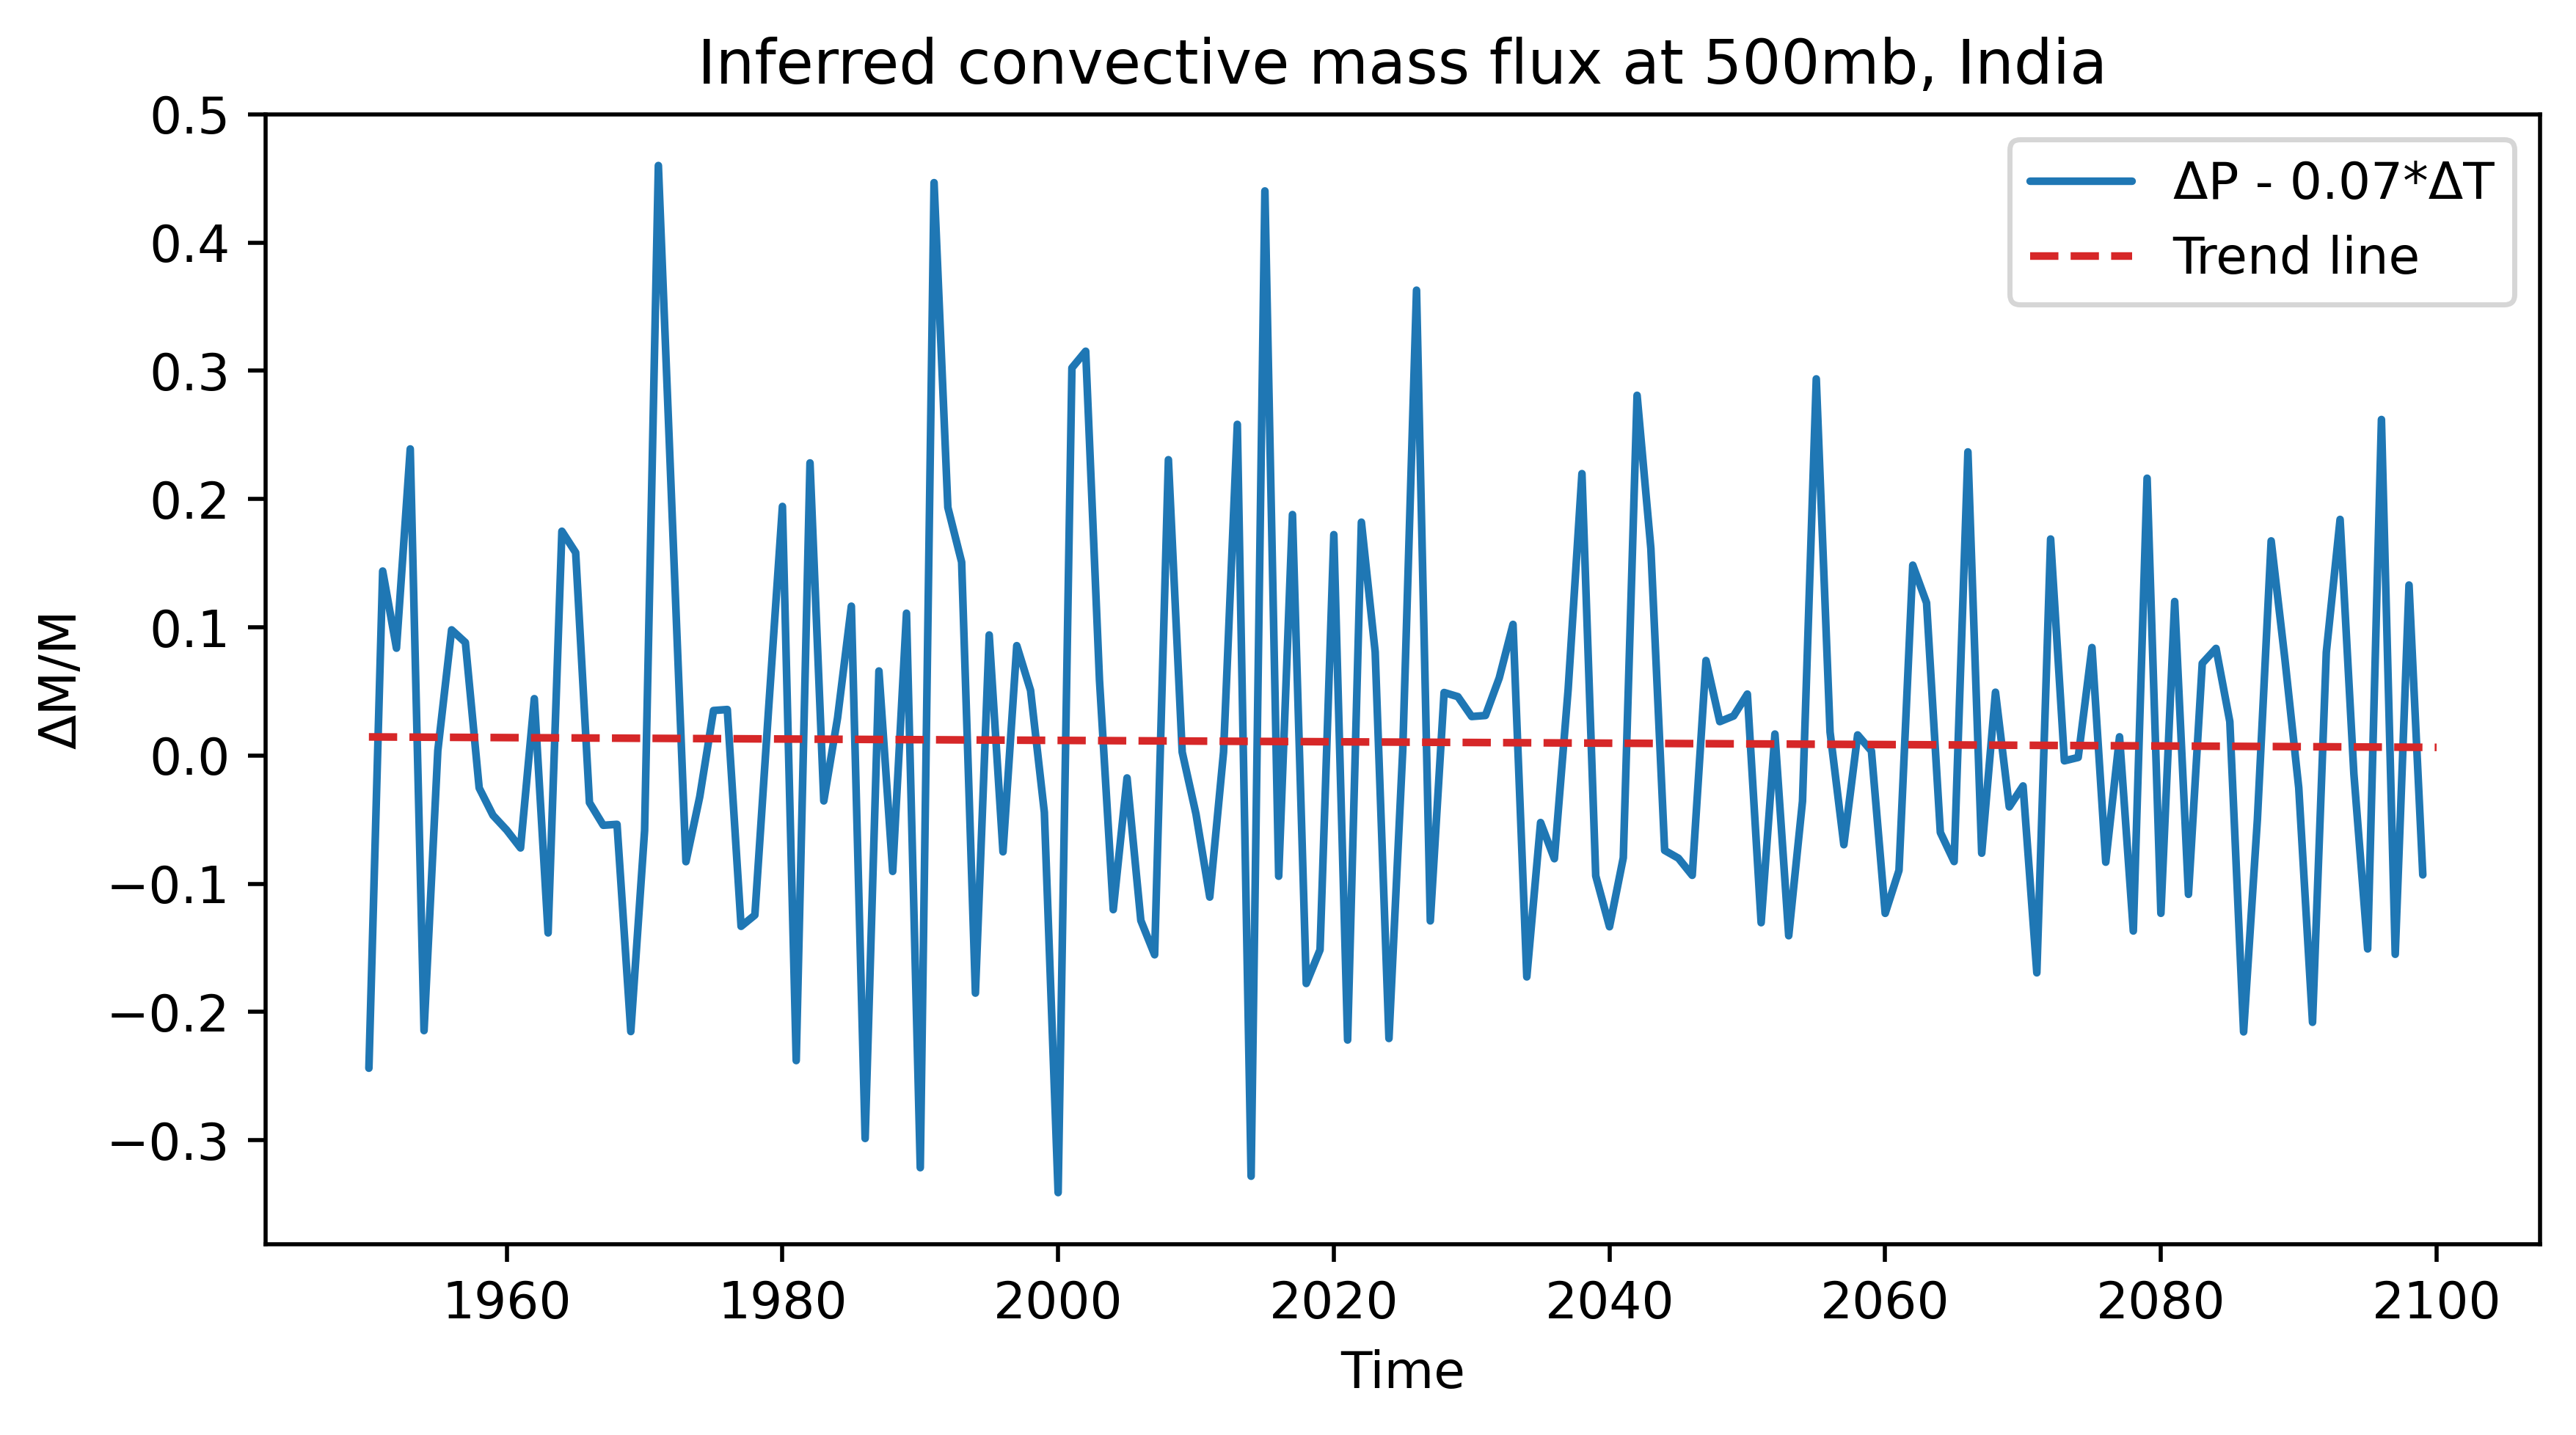

In [41]:
plt.rcParams['figure.figsize'] = [8, 4]


plt.plot(X[:-1], dmbym, label='\u0394P - 0.07*\u0394T', solid_capstyle='round', c='tab:blue')
plt.plot(X, y_line1, c='tab:red', label='Trend line', ls='--')
plt.ylabel('\u0394M/M')
plt.xlabel('Time')
plt.legend()
plt.title('Inferred convective mass flux at 500mb, India')

In [27]:
T0 = clim1.ta.sel(plev=100000).where(mask1>0).mean(dim=['lat', 'lon'])

In [44]:
T0 = np.array([304.02203, 305.4985 , 305.4634 , 304.9231 , 303.64325, 304.3646 ,
       305.06903, 304.76935, 303.7781 , 304.33142, 304.62042, 304.52005,
       304.28683, 304.45312, 304.7212 , 305.1684 , 304.08972, 304.21356,
       304.55838, 304.73572, 305.23648, 306.28485, 304.57623, 303.22116,
       303.406  , 304.24884, 304.24878, 303.64804, 304.3351 , 304.93063,
       304.89426, 304.86978, 304.944  , 304.8521 , 304.963  , 303.98886,
       303.59177, 305.02136, 304.90958, 305.6559 , 304.86276, 306.70688,
       304.97534, 304.81897, 303.49652, 303.93137, 304.04227, 303.80145,
       304.53143, 303.71393, 304.15594, 305.1156 , 305.61624, 304.62567,
       303.9166 , 304.23535, 303.79834, 304.87875, 305.8932 , 304.9026 ,
       304.32327, 304.40613, 305.26385, 305.12054, 303.87762, 305.0663 ,
       305.18835, 305.13324, 304.1333 , 304.30472, 305.17325, 304.45084,
       305.46298, 304.6775 , 304.7361 , 305.2337 , 305.52658, 304.60107,
       305.11856, 305.18307, 305.47415, 305.35202, 305.45575, 304.29752,
       303.78375, 304.8017 , 305.0094 , 305.8857 , 305.83365, 304.82452,
       305.02673, 305.9001 , 306.76395, 305.9926 , 304.94287, 304.92932,
       304.60223, 305.73932, 306.20105, 306.39786, 305.1676 , 304.91824,
       306.17215, 305.2816 , 306.28925, 306.97156, 306.09647, 305.24304,
       305.3041 , 305.21   , 305.65204, 306.56866, 306.97137, 307.06665,
       306.23923, 305.53934, 306.50897, 306.22607, 307.1595 , 306.40683,
       305.80978, 306.39993, 307.13278, 307.21118, 307.26175, 306.5551 ,
       306.17288, 307.04324, 306.55933, 307.90143, 306.3465 , 307.11618,
       306.4799 , 307.182  , 307.56647, 307.52408, 306.9832 , 307.0789 ,
       308.55124, 308.38782, 307.85248, 307.63202, 308.2129 , 309.58682,
       308.05295, 307.34885, 308.60187, 307.8214 , 308.1397 , 308.56226,
       308.73718])

In [45]:
gamma = 0.006603245

In [46]:
Tnew = T0 - gamma*z

In [47]:
Mnew = w/Tnew
dMnew = np.ediff1d(M2)

In [48]:
dmnewm = dMnew/Mnew[:-1]

Text(0.5, 1.0, 'Convective mass flux at 500mb, India')

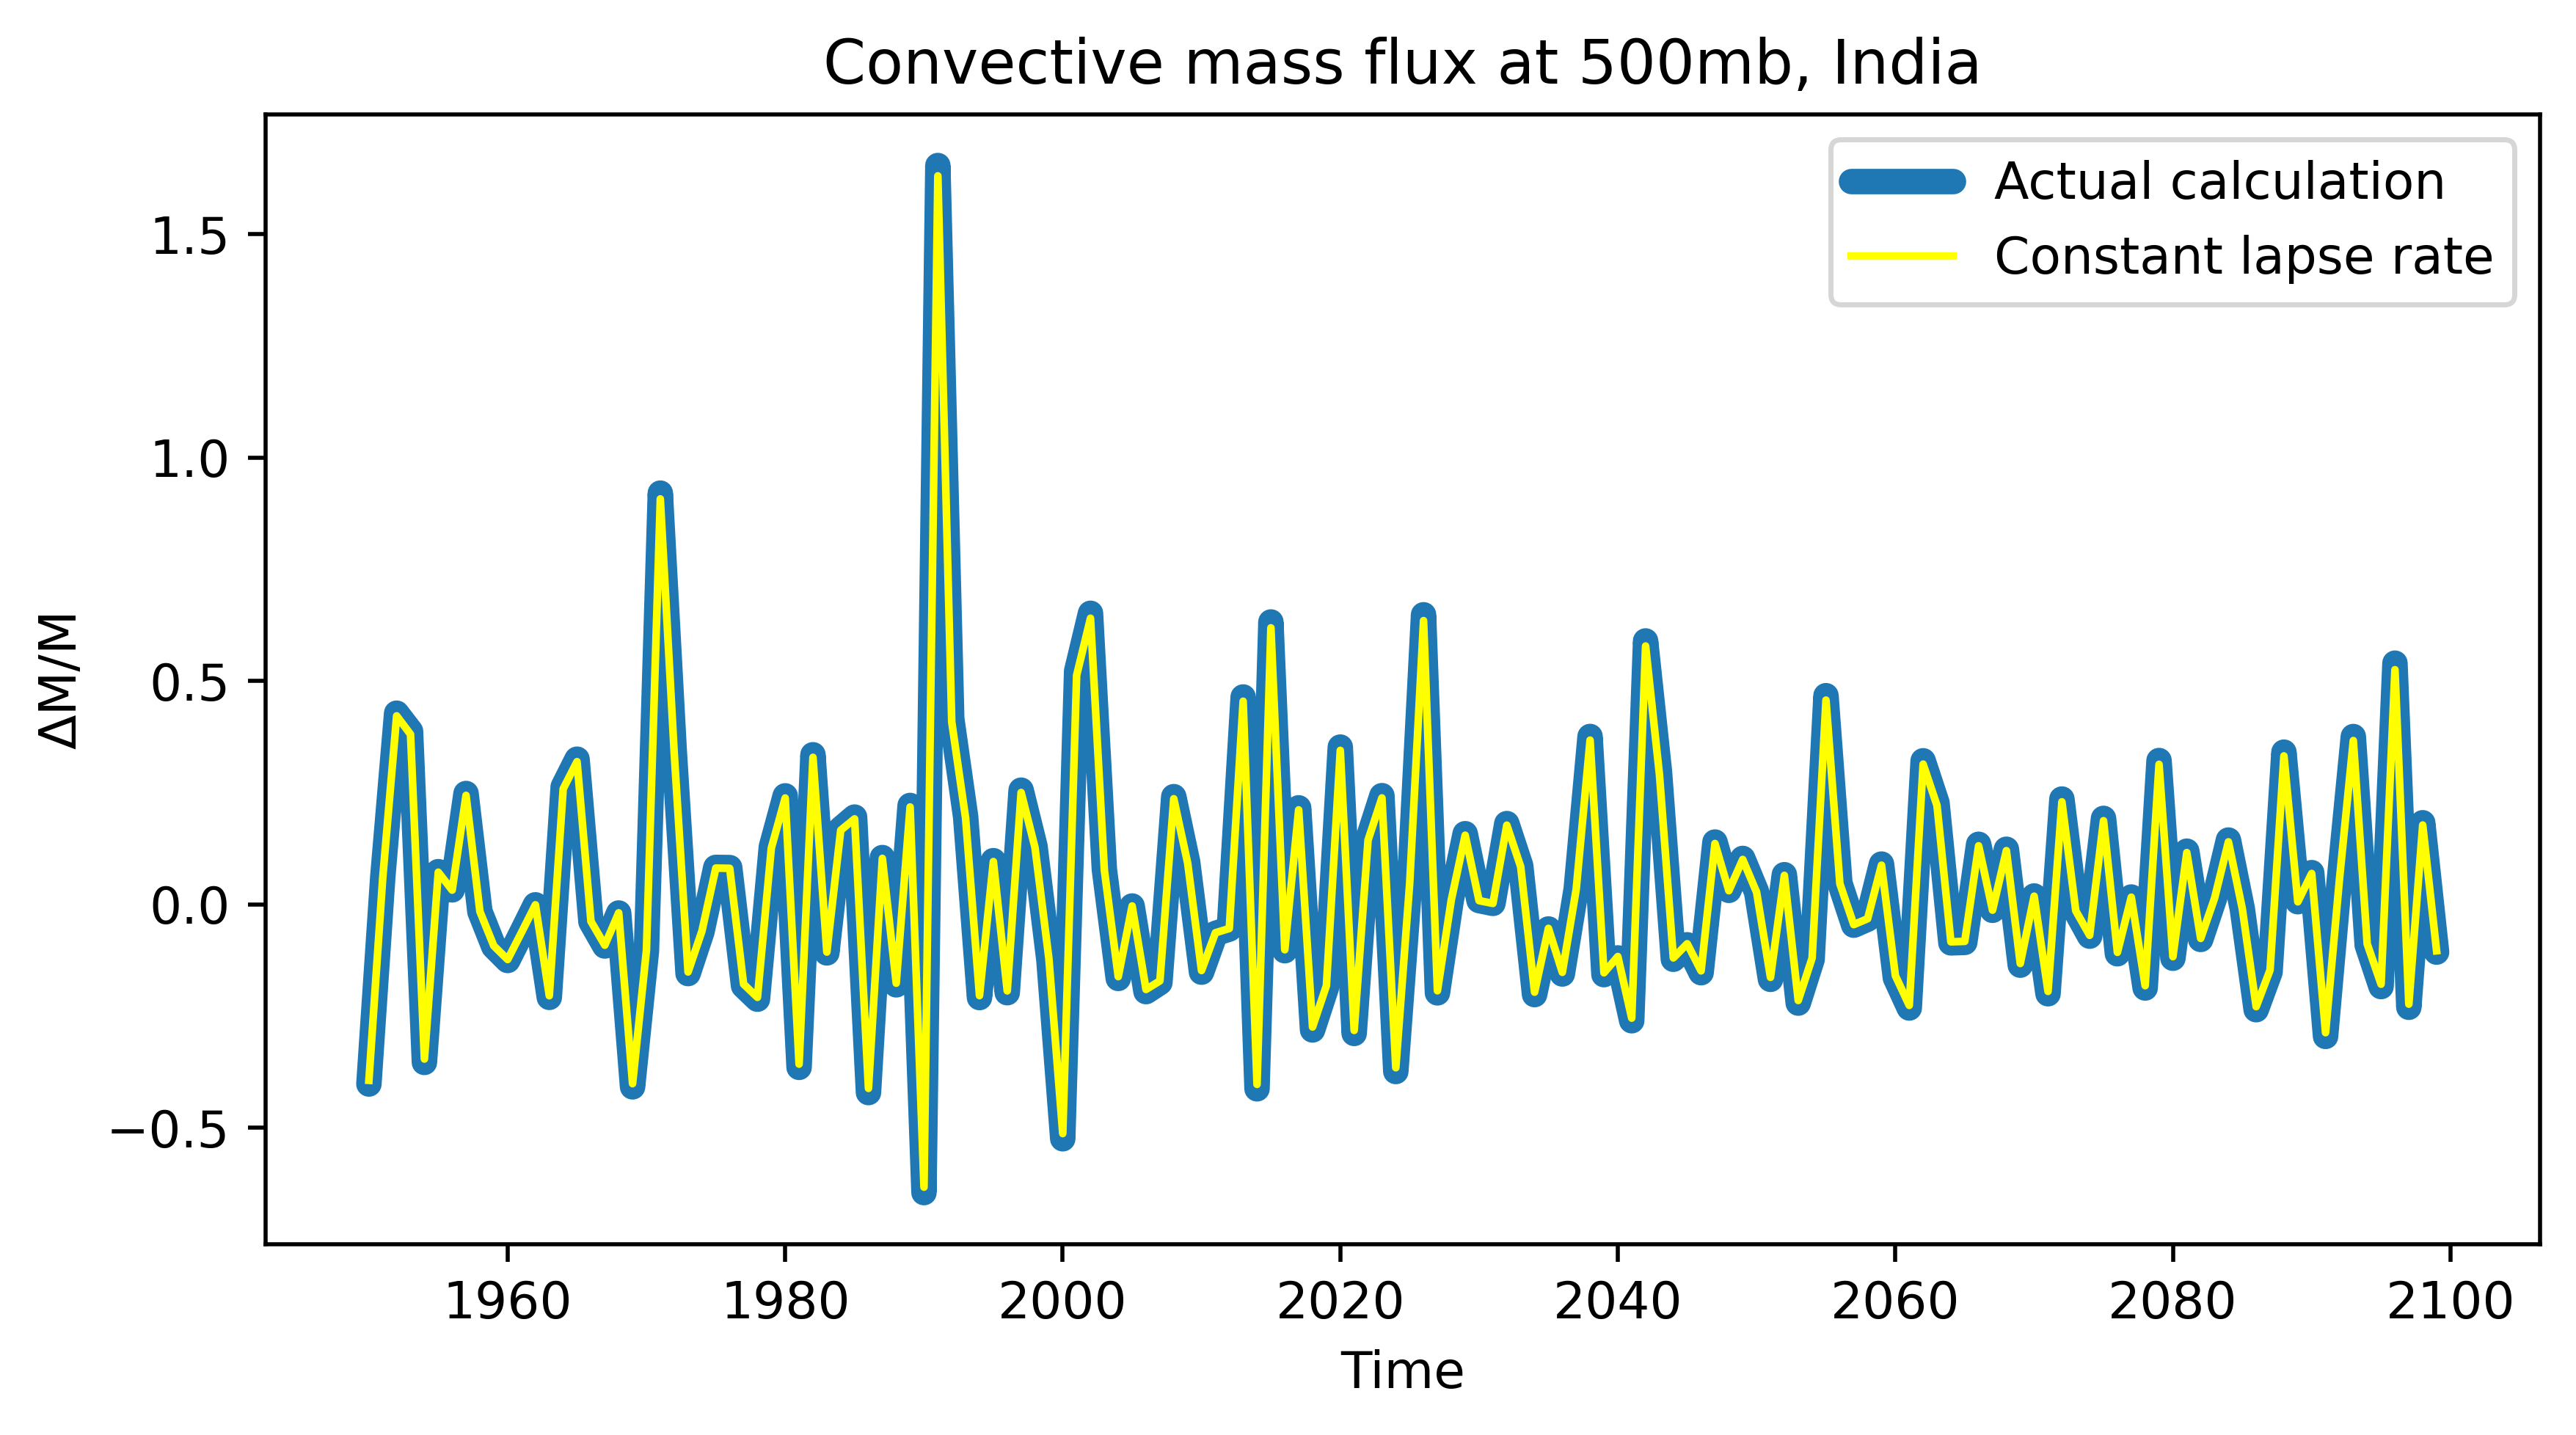

In [70]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.plot(X[:-1], dMbyM, label='Actual calculation',lw=5, solid_capstyle='round')
#plt.plot(X[:-1], dmbym, label='Inferred from P and T')
plt.plot(X[:-1], dmnewm, label='Constant lapse rate', color='yellow')
plt.ylabel('\u0394M/M')
plt.xlabel('Time')
plt.legend()
plt.title('Convective mass flux at 500mb, India')

# Lapse rate calculation

In [43]:
date1 = clim1.sel(year=1950)
date2 = clim1.sel(year=2100)

In [44]:
date = date1

In [45]:
q = date.hus.where(mask1>0).mean(dim=['lat', 'lon']).squeeze()
q0 = q.sel(plev=100000)
divq = np.divide(q,q0)

p=date.plev
p0=100000
divp = np.divide(p,p0)

T = date.ta.where(mask1>0).mean(dim=['lat', 'lon']).squeeze()
T0 = T.sel(plev=100000)

z = date.zg.where(mask1>0).mean(dim=['lat', 'lon']).squeeze()

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
gammalist=[]
lambdalist=[]
k = date.year
x1, y1 = np.log(divq.sel(year=k)).values.reshape(-1, 1), np.log(divp).values.reshape(-1, 1)
regr.fit(x1, y1)
y_pred1 = regr.predict(x1)
lambda1 = regr.coef_[0][0]
lambdalist.append(lambda1)
    
x2, y2 = z.sel(year=k).values.reshape(-1, 1), T.sel(year=k).values.reshape(-1, 1)
regr.fit(x2, y2)
y_pred2 = regr.predict(x2)
gamma1 = regr.coef_[0][0]
gammalist.append(gamma1) 

In [52]:
q = clim1.hus.where(mask1>0).mean(dim=['lat', 'lon']).squeeze()
q0 = q.sel(plev=100000)
divq = np.divide(q,q0)

p=clim1.plev
p0=100000
divp = np.divide(p,p0)

T = clim1.ta.where(mask1>0).mean(dim=['lat', 'lon']).squeeze()
T0 = T.sel(plev=100000)

z = clim1.zg.where(mask1>0).mean(dim=['lat', 'lon']).squeeze()

In [57]:
dates = [1950, 2100]

In [58]:
regr = LinearRegression()
gammalist=[]
lambdalist=[]
for k in dates:
    x1, y1 = np.log(divq.sel(year=k)).values.reshape(-1, 1), np.log(divp).values.reshape(-1, 1)
    regr.fit(x1, y1)
    y_pred1 = regr.predict(x1)
    lambda1 = regr.coef_[0][0]
    lambdalist.append(lambda1)
    
    x2, y2 = z.sel(year=k).values.reshape(-1, 1), T.sel(year=k).values.reshape(-1, 1)
    regr.fit(x2, y2)
    y_pred2 = regr.predict(x2)
    gamma1 = regr.coef_[0][0]
    gammalist.append(gamma1) 

In [59]:
gammalist

[-0.0017448366, -0.0023678662]